In [18]:
!pip install labelme tensorflow opencv-python matplotlib numpy albumentations tensowflow-gpu
import os
import time
import uuid
import cv2
IMAGE_PATH = os.path.join('data','images')
number_images = 30

cap = cv2.VideoCapture(0)
for image_num in range(30):
    print(image_num)
for imgnum in range(number_images):
    print('Collecting image{}'.format(imgnum))
    ret,frame = cap.read()
    imgnum = os.path.join(IMAGE_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgnum,frame)
    cv2.imshow('frame',frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
!labelme






ERROR: Could not find a version that satisfies the requirement tensowflow-gpu (from versions: none)
ERROR: No matching distribution found for tensowflow-gpu


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
^C


2024-03-22 17:16:00,498 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\tron7\.labelmerc


In [15]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt 

# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

tf.config.list_physical_devices('GPU')



[]

In [26]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg',shuffle=False)


InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: data\\images\\*.jpg'

In [ ]:
images.as_numpy_iterator().next()

b'data\\images\\b67b4983-e841-11ee-87fd-401a58da0da5.jpg'

In [ ]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [ ]:
images = images.map(load_image)

NameError: name 'images' is not defined

In [ ]:
images.as_numpy_iterator().next()


array([[[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 1, 3],
        [0, 1, 3],
        [0, 1, 3]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 1, 3],
        [0, 1, 3],
        [0, 1, 3]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 1, 3],
        [0, 1, 3],
        [0, 1, 3]],

       ...,

       [[0, 1, 3],
        [0, 1, 3],
        [0, 1, 3],
        ...,
        [0, 1, 3],
        [0, 1, 3],
        [0, 1, 3]],

       [[0, 1, 3],
        [0, 1, 3],
        [0, 1, 3],
        ...,
        [0, 1, 3],
        [0, 1, 3],
        [0, 1, 3]],

       [[0, 1, 3],
        [0, 1, 3],
        [0, 1, 3],
        ...,
        [0, 1, 3],
        [0, 1, 3],
        [0, 1, 3]]], dtype=uint8)

In [ ]:
image_generator = images.batch(4).as_numpy_iterator()


NameError: name 'images' is not defined

In [ ]:
plot_images = image_generator.next()


NameError: name 'image_generator' is not defined

NameError: name 'plot_images' is not defined

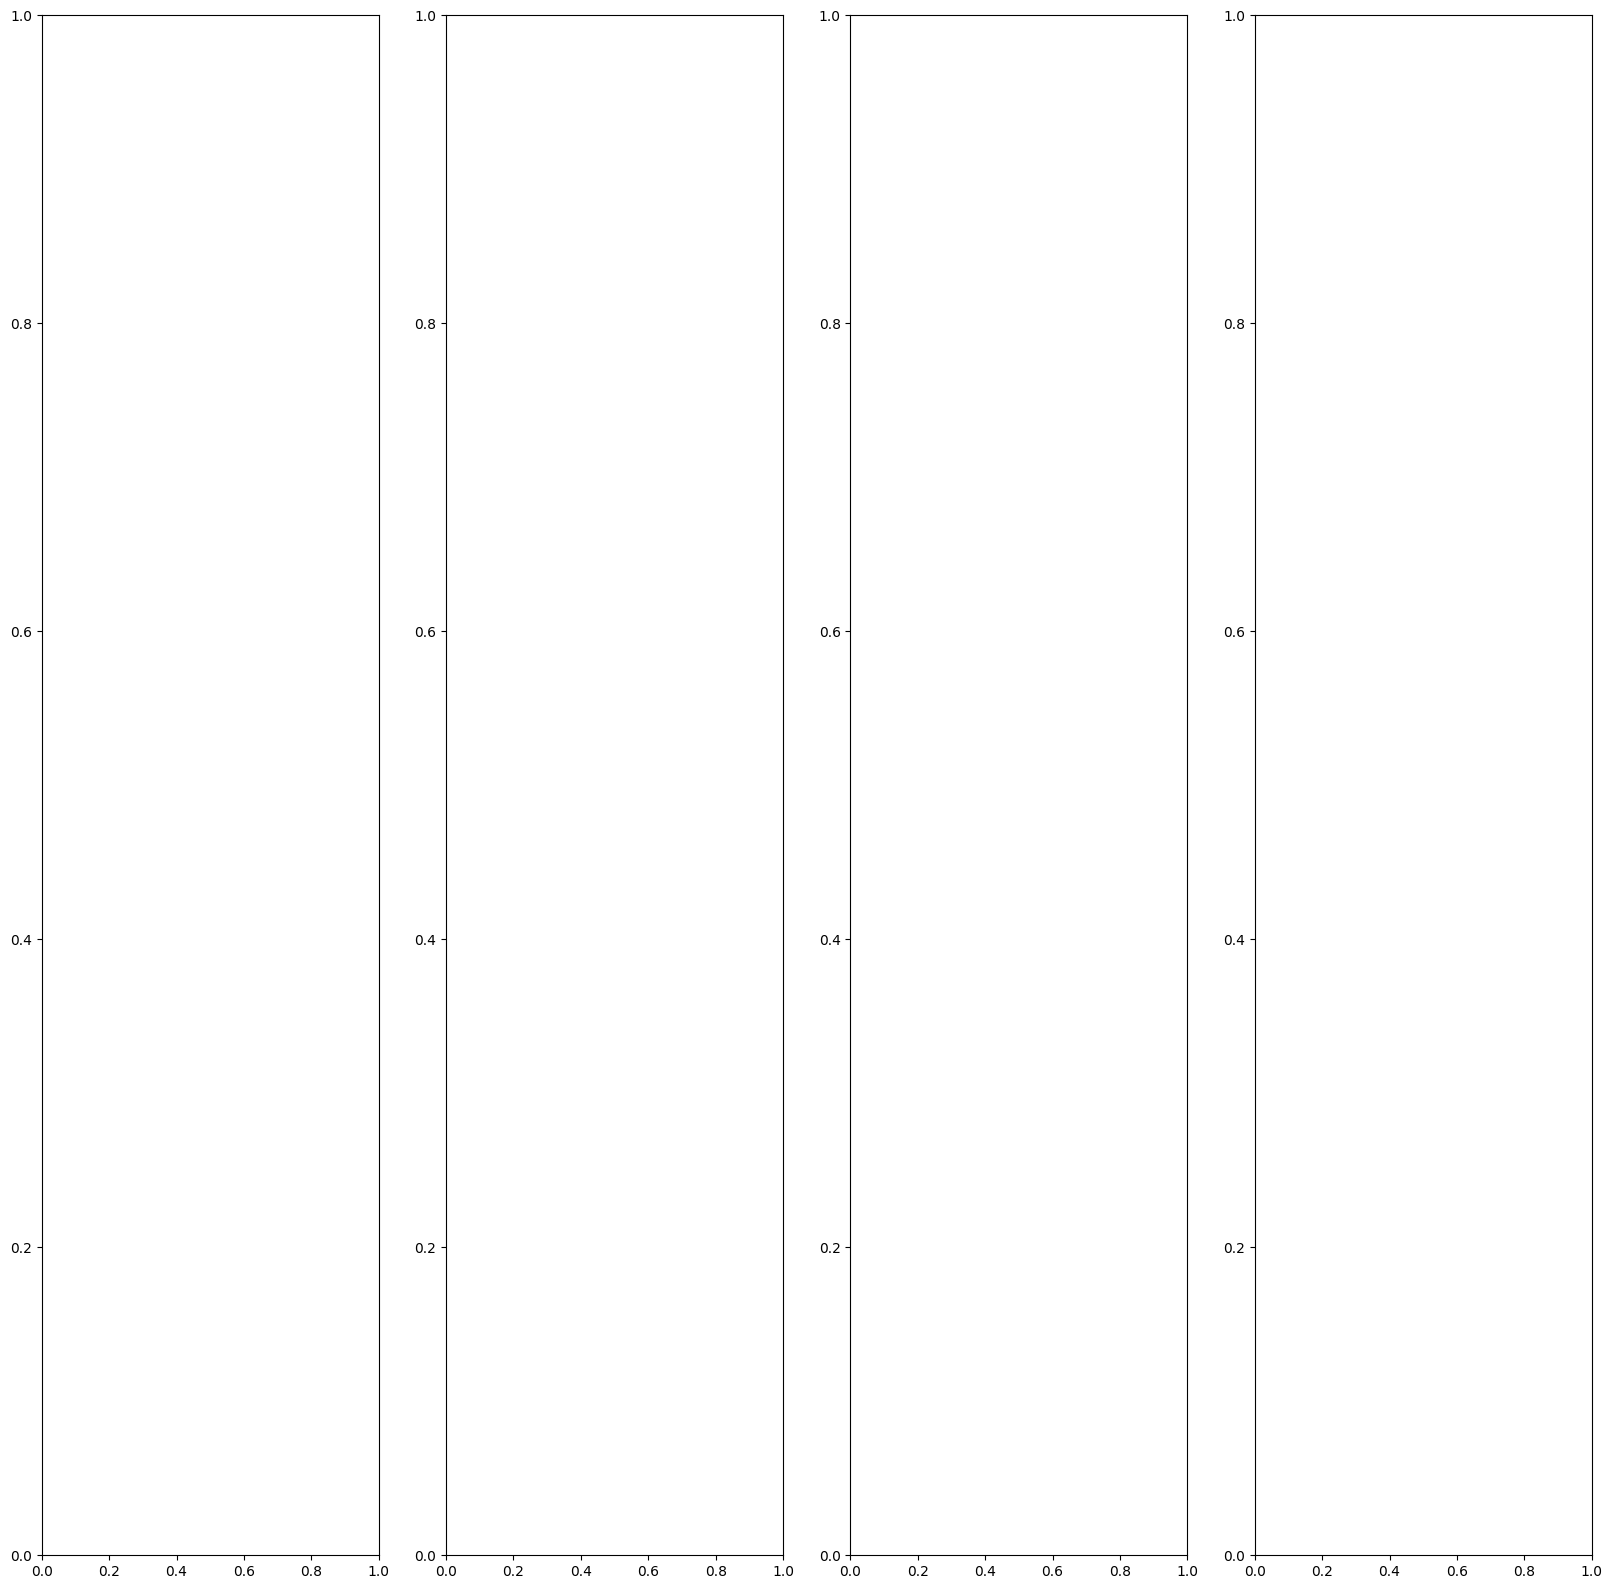

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [ ]:
30*.7 #21 to train

21.0

In [ ]:
30* .15 #5 to test and 4 to val

4.5

In [ ]:
#move to matching labels
import os
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data',folder,'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels',filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)



In [ ]:

img = cv2.imread(os.path.join('data','train','images','5a05ffab-e791-11ee-8e3c-401a58da0da5.jpg'))
image.shape

NameError: name 'image' is not defined

In [ ]:
import albumentations as alb
augmentor = alb.Compose([alb.RandomCrop(width=450,height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                        bbox_params=alb.BboxParams(format='albumentations',
                                                    label_fields=['class_labels']))



In [27]:
import cv2
import json
img = cv2.imread(os.path.join('data','train','images','591418c4-e791-11ee-8e90-401a58da0da5.jpg'))
img
with open(os.path.join('data','train','labels','591418c4-e791-11ee-8e90-401a58da0da5.json'),'r') as f:
    label = json.load(f)
label['shapes'][0]['points']

[[296.5182186234818, 163.27935222672068],
 [512.7125506072874, 403.36032388663966]]

In [28]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]
coords
coords = list(np.divide(coords,[640,480,640,480]))
coords

[0.4633097165991903, 0.3401653171390014, 0.8011133603238866, 0.840334008097166]

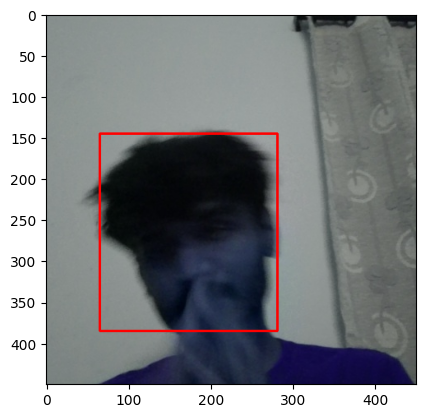

In [29]:
augmented = augmentor(image=img, bboxes =[coords],class_labels=['faces'])
augmented['bboxes']
cv2.rectangle(augmented['image'], 
                tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
                tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)),
                     (255,0,0), 2)
plt.imshow(augmented['image'])

In [30]:
#augmentation for multiple images
import os
import cv2
import json

for partition in ['val','test','train']:
    for image in os.listdir(os.path.join('data',partition,'images')):
        img = cv2.imread(os.path.join('data',partition,'images',image))

        coords = [0,0,0.00001,0.000001]
        label_path = os.path.join('data',partition,'labels',f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path,'r')as f:
                label = json.load(f)
            
            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords,[640,480,640,480]))

        try:
             for x in range(60):
                 augmented = augmentor(image=img,bboxes=[coords],class_labels=['face'])
                 cv2.imwrite(os.path.join('aug_data',partition,'images',f'{image.split(".")[0]}.{x}.jpg'),augmented['image'])
                 annotation = {}
                 annotation['image']= image

                 if os.path.exists(label_path):
                         if len(augmented['bboxes']) == 0:
                            annotation['bbox']=[0,0,0,0]
                            annotation['class']= 0
                         else:
                            annotation['bbox']= augmented['bboxes'][0]
                            annotation['class']= 1
        
                 else:
              
                        annotation['bbox']=[0,0,0,0]
                        annotation['class']= 0
        
                 with open(os.path.join('aug_data',partition,'labels',f'{image.split(".")[0]}.{x}.json'),'w') as f:
                    json.dump(annotation,f)

        except Exception as e:
         print(e)

In [31]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle = False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x,(120,120)))
train_images = train_images.map(lambda x: x/255)

In [32]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle = False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x,(120,120)))
test_images = test_images.map(lambda x: x/255)

In [33]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle = False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x,(120,120)))
val_images = val_images.map(lambda x: x/255)

In [34]:
train_images.as_numpy_iterator().next()

array([[[0.17628677, 0.16844362, 0.1723652 ],
        [0.23272058, 0.22487745, 0.22879902],
        [0.27567402, 0.26783088, 0.27175245],
        ...,
        [0.5264706 , 0.5264706 , 0.5235294 ],
        [0.51096815, 0.51096815, 0.50802696],
        [0.5126838 , 0.5126838 , 0.5097426 ]],

       [[0.2716299 , 0.2716299 , 0.2716299 ],
        [0.1548407 , 0.1548407 , 0.1548407 ],
        [0.16415441, 0.16415441, 0.16415441],
        ...,
        [0.5132353 , 0.5132353 , 0.50539213],
        [0.5136642 , 0.5136642 , 0.50582105],
        [0.5185662 , 0.5185662 , 0.51072305]],

       [[0.3408701 , 0.3408701 , 0.3408701 ],
        [0.33878675, 0.33878675, 0.33878675],
        [0.2125    , 0.2125    , 0.2125    ],
        ...,
        [0.509375  , 0.51329654, 0.49368873],
        [0.5136029 , 0.5175245 , 0.49791667],
        [0.5153799 , 0.5193015 , 0.49969363]],

       ...,

       [[0.17077206, 0.03351716, 0.06096814],
        [0.16721813, 0.02996323, 0.05741422],
        [0.1721201 , 0

In [35]:
#load labels
def load_labels(label_path):
    with open(label_path.numpy(),'r',encoding = "utf-8") as f:
        label = json.load(f)

    return [label['class']], label['bbox']

train_labels= tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle = False)
train_labels= train_labels.map(lambda x : tf.py_function(load_labels,[x],[tf.uint8,tf.float16]))

test_labels= tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle = False)
test_labels= test_labels.map(lambda x : tf.py_function(load_labels,[x],[tf.uint8,tf.float16]))

val_labels= tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle = False)
val_labels= val_labels.map(lambda x : tf.py_function(load_labels,[x],[tf.uint8,tf.float16]))
train_labels.as_numpy_iterator().next()


(array([1], dtype=uint8),
 array([0.2114, 0.2812, 0.681 , 0.8228], dtype=float16))

In [36]:
#checking the partition length
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(2520, 2520, 600, 600, 480, 480)

In [37]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)
train.as_numpy_iterator().next()[1]

(array([[1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0]], dtype=uint8),
 array([[0.     , 0.3154 , 0.4429 , 0.9155 ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.     , 0.11237, 0.3127 , 0.679  ],
        [0.1522 , 0.103  , 0.621  , 0.671  ],
        [0.7163 , 0.3591 , 1.     , 0.881  ],
        [0.     , 0.38   , 0.4387 , 0.933  ],
        [0.     , 0.     , 0.     , 0.     ],
        [0.     , 0.     , 0.     , 0.     ]], dtype=float16))

In [ ]:
data_samples = train.as_numpy_iterator()

In [39]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


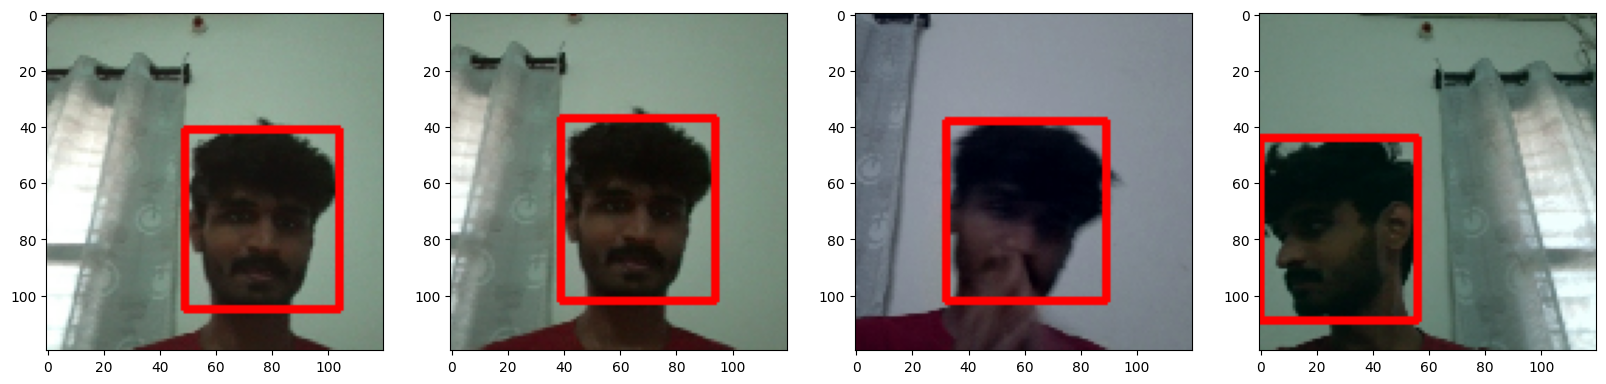

In [40]:
# Assuming sample_image is your NumPy array
# Convert it to a cv::UMat object



fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_image_cv = cv2.UMat(sample_image)
    sample_coords = res[1][1][idx]
       
    cv2.rectangle(sample_image_cv,
                 tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                 tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                           (255,0,0), 2)
    sample_image_np = sample_image_cv.get()

    
    ax[idx].imshow(sample_image_np)

In [41]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16


In [42]:
vgg = VGG16(include_top=False)
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
#build instance of network
def build_model():
  
  
    input_layer = Input(shape=(120,120,3))

    vgg = VGG16(include_top=False)(input_layer)

#classification model
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)

#bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)

    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [70]:
facetracker = build_model()
facetracker.summary()
x,y = train.as_numpy_iterator().next()
x.shape
classes, coords = facetracker.predict(x)
classes,coords

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 120, 120,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 3, 3, 512) │ 14,714,688 │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 2048)      │  1,050,624 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 1)         │      2,049 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 4)         │      8,196 │ dense_10[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,826,181 (64.19 MB)

 Trainable params: 16,826,181 (64.19 MB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step


(array([[0.77046007],
        [0.7380442 ],
        [0.71255624],
        [0.7560621 ],
        [0.7027115 ],
        [0.77141285],
        [0.751595  ],
        [0.72911835]], dtype=float32),
 array([[0.43908823, 0.54022276, 0.42798153, 0.5468818 ],
        [0.42808235, 0.5414177 , 0.3966082 , 0.5578434 ],
        [0.4742994 , 0.49378848, 0.4957913 , 0.56599355],
        [0.45748198, 0.53286254, 0.41647077, 0.5453446 ],
        [0.5164356 , 0.570656  , 0.43294013, 0.5847783 ],
        [0.43938464, 0.5492933 , 0.42952588, 0.6046233 ],
        [0.45852795, 0.57107246, 0.4429405 , 0.6114018 ],
        [0.4588369 , 0.5928961 , 0.4863794 , 0.63743186]], dtype=float32))

In [71]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decay)

In [72]:
# Create Localization Loss and Classification Loss
def localization_loss(y_true, yhat):            
     delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2])) 
     h_true = y_true[:,3] - y_true[:,1] #height
     w_true = y_true[:,2] - y_true[:,0] #width

     h_pred = yhat[:,3] - yhat[:,1]  #predicted height
     w_pred = yhat[:,2] - yhat[:,0] #predicted width

     delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))

     return delta_coord + delta_size

In [73]:
class MeanSquaredError(tf.keras.losses.Loss):
    def call(self, y_true, y_pred):
        return tf.reduce_mean(tf.square(y_true - y_pred), axis=-1)

classloss = MeanSquaredError()
regressloss = localization_loss

In [74]:
localization_loss(y[1],coords)
classloss(y[0], classes)
regressloss(y[1],coords)

<tf.Tensor: shape=(), dtype=float32, numpy=5.0135403>

In [4]:
#  Train Neural Network
#  Create Custom Model Class

class FaceTracker(Model): 
    def __init__(self, eyetracker, **kwargs):
         super().__init__(**kwargs)
         self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
          super().compile(**kwargs)
          self.closs = classloss
          self.lloss = localizationloss
          self.opt = opt

    def train_step(self, batch, **kwargs):
        X, y = batch

        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)

            y_reshaped = tf.reshape(y[0], (-1,))
            batch_classloss = self.closs(y_reshaped, classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localizationloss + 0.5 * batch_classloss

            grad = tape.gradient(total_loss, self.model.trainable_variables)
            self.opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss": total_loss, "class_loss": batch_classloss, "regress_loss": batch_localizationloss}

    def test_step(self, batch, **kwargs):
        X, y = batch

        classes, coords = self.model(X, training=False)

        y_reshaped = tf.reshape(y[0], (-1,))
        batch_classloss = self.closs(y_reshaped, classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss + 0.5 * batch_classloss

        return {"total_loss": total_loss, "class_loss": batch_classloss, "regress_loss": batch_localizationloss}

    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)



NameError: name 'Model' is not defined

In [ ]:
print("Shape of classes:", classes.shape)
print("Shape of coords:", coords.shape)

Shape of classes: (8, 1)
Shape of coords: (8, 4)


In [ ]:

print("Shape of y[0]:", y[0].shape)
print("Shape of classes:", classes.shape)

Shape of y[0]: (8, 1)
Shape of classes: (8, 1)


In [ ]:
model = FaceTracker(facetracker)
model.compile(opt,classloss,regressloss)

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback]) #history tht will plot our performance
hist.history

Epoch 1/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 121s 381ms/step - class_loss: 0.2052 - regress_loss: 0.0462 - total_loss: 0.1488 - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 117s 369ms/step - class_loss: 0.2049 - regress_loss: 0.0131 - total_loss: 0.1156 - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 120s 378ms/step - class_loss: 0.2052 - regress_loss: 0.0084 - total_loss: 0.1110 - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 119s 375ms/step - class_loss: 0.2031 - regress_loss: 0.0078 - total_loss: 0.1093 - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 124s 389ms/step - class_loss: 0.2046 - regress_loss: 0.0084 - total_loss: 0.1107 - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/10
315/315 ━━━━━━━━━━━━━━━━━━━━ 118s 371ms/step - class_loss: 0.2044 - regress_loss: 0.0078 - total_loss: 0.1099 - loss: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10
315/315 ━━━

{'loss': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'val_loss': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}

KeyError: 'total_loss'

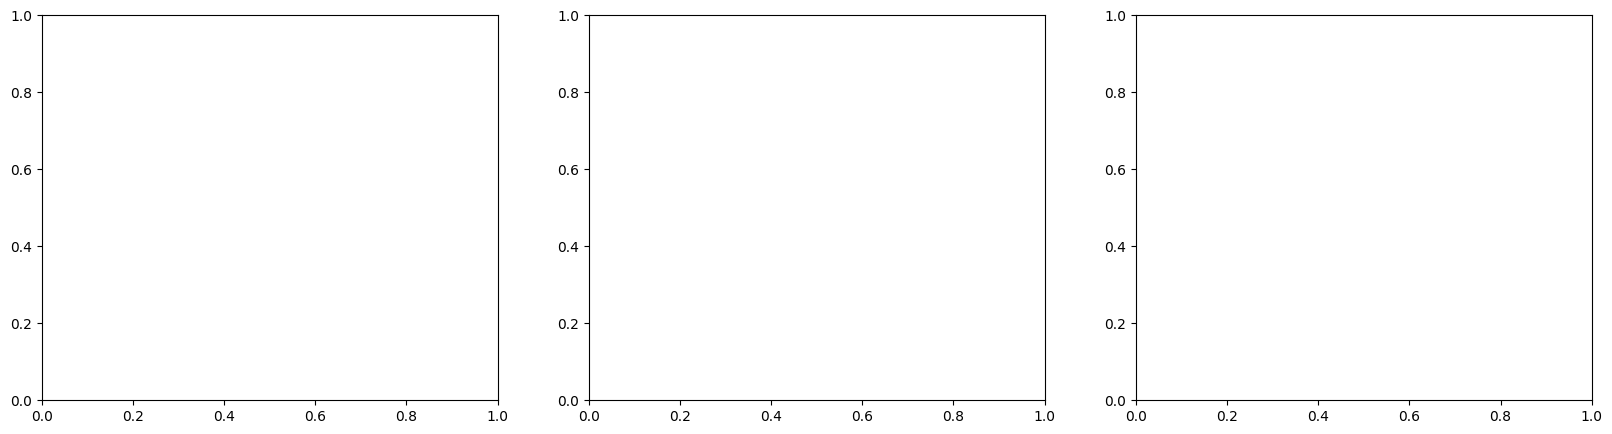

In [ ]:
#PLOT PERFORMANCE

fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

make predictions on test set

In [ ]:
test_data = test.as_numpy_iterator()

In [ ]:
test_sample = test_data.next()

In [ ]:
yhat = facetracker.predict(test_sample[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


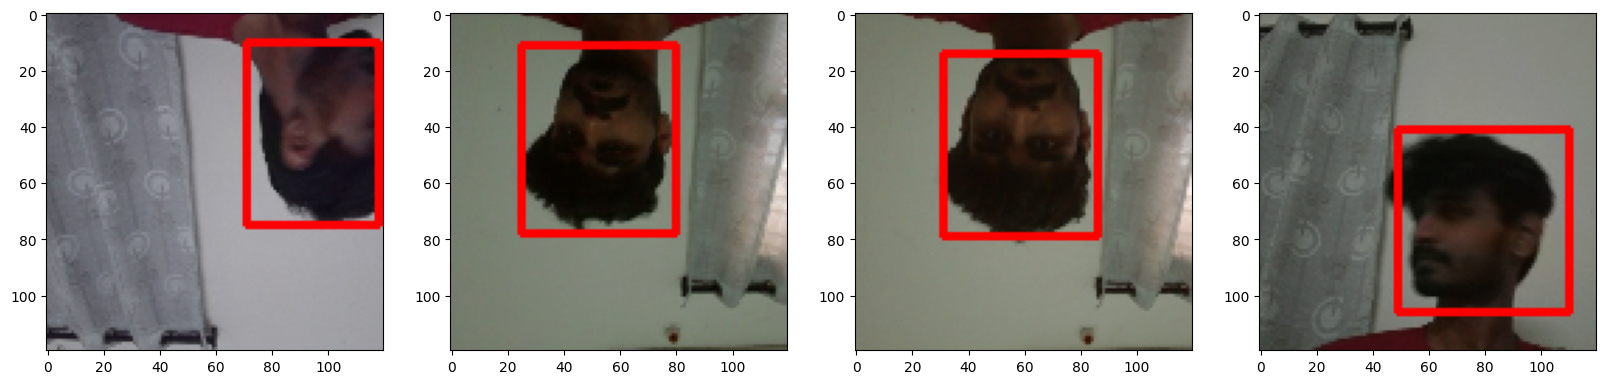

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_image_cv = cv2.UMat(sample_image)
    sample_coords = yhat[1][idx]

    if yhat[0][idx] >  0.5:

        cv2.rectangle(sample_image_cv,
                 tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                 tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                           (255,0,0), 2)
    sample_image_np = sample_image_cv.get()

    
    ax[idx].imshow(sample_image_np)

In [2]:
#save the model
from tensorflow.keras.models import load_model

In [3]:
facetracker.save('my_model.keras')

NameError: name 'facetracker' is not defined

In [ ]:

facetracker = load_model('my_model.keras')

In [ ]:
import cv2 
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt 
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))

    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
 
    if yhat[0] > 0.5:
# Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
# Controls the label rectangle\n",
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)

 # Controls the text rendered\n",
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
 
    cv2.imshow('EyeTrack', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

NameError: name 'facetracker' is not defined